<a href="https://colab.research.google.com/github/garry-p12/DSC240_HW4/blob/main/Q3_dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q3. PCA for Dimension Reduction (30 points)
In this problem, we will implement the Principal Component analysis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces


def pca(data, num_components):
    mean_face = np.mean(data, axis=0)
    X = data - mean_face


    cov_matrix = np.cov(X, rowvar=False)


    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]


    top_eigenvalues = eigenvalues[:num_components]
    top_eigenvectors = eigenvectors[:, :num_components]

    return top_eigenvalues, top_eigenvectors




data = fetch_olivetti_faces().data

num_components = 20
eigenvalues, principal_components = pca(data, num_components)





downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


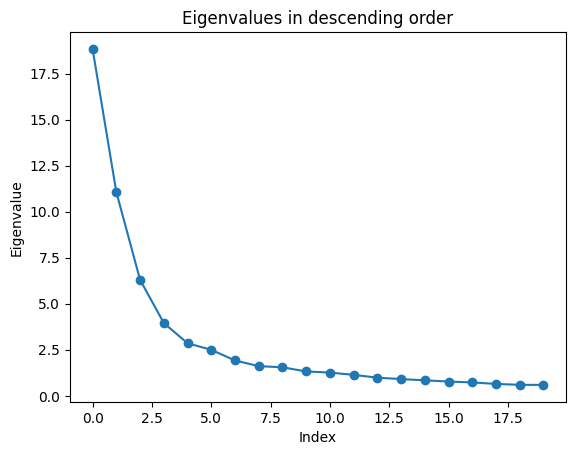

In [ ]:

plt.figure()
plt.plot(eigenvalues, marker='o')
plt.title("Eigenvalues in descending order")
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.show()

Eigenfaces shape: (20, 64, 64)


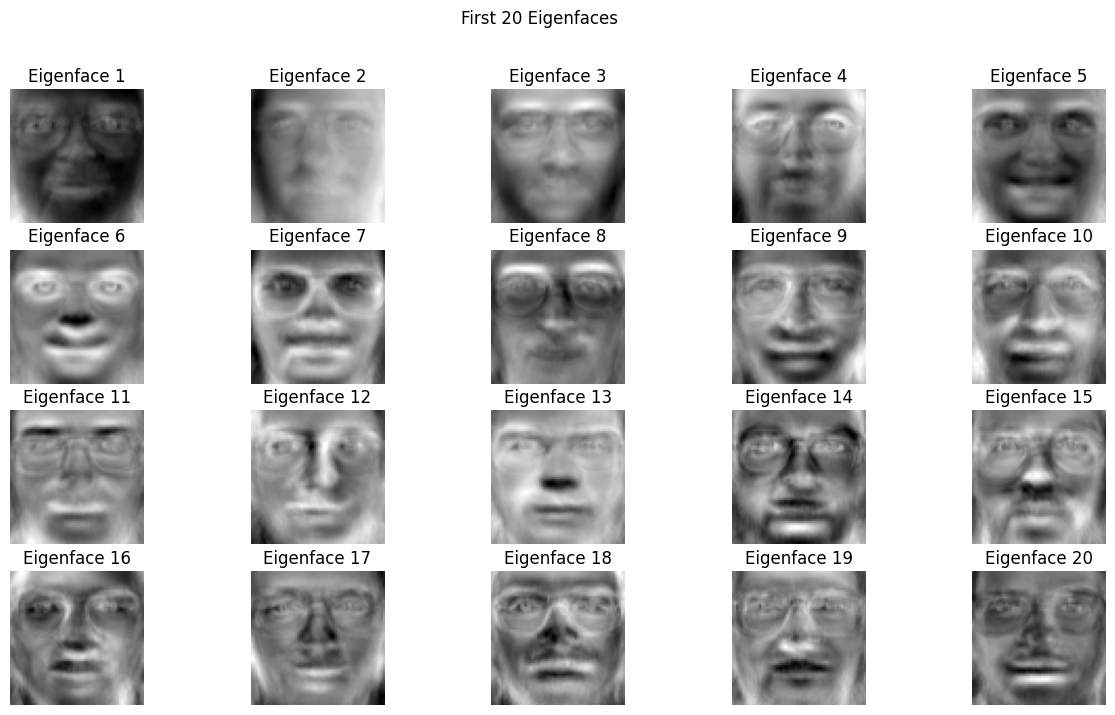

In [ ]:


# Eigenfaces would be the principal components reshaped as images
eigenfaces = principal_components.T.reshape((-1, 64, 64))
print("Eigenfaces shape:", eigenfaces.shape)

# Visualize the first 20 eigenfaces
plt.figure(figsize=(15, 8))
for i, eigenface in enumerate(eigenfaces):
    plt.subplot(4, 5, i + 1)
    plt.imshow(eigenface.reshape(64, 64), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.suptitle('First 20 Eigenfaces')
plt.show()

## Answer the following questions

1. When you rerun PCA with different choices of "number_of_components" do they return the same or different solutions? Why?

2. How would you interpret the eigenfaces above?